# Choosing the right estimator/algorithm for our problem
 - Classification - Predicting wheter a sample is onething or another
 * Regression - Predicting a number

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [4]:
## Immporting the data
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [5]:
#  Import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [7]:
boston_df = pd.DataFrame(boston["data"],columns = boston["feature_names"])
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


<AxesSubplot:>

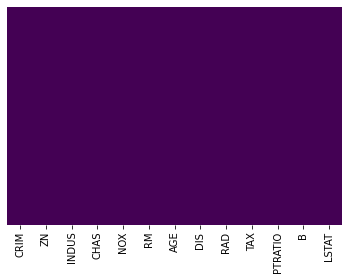

In [12]:
sns.heatmap(boston_df.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [15]:
boston_df["target"] = pd.Series(boston["target"])

In [16]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


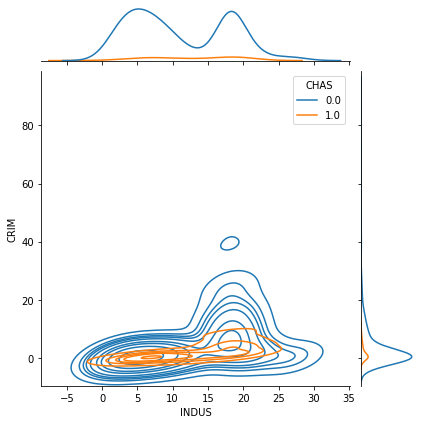

In [25]:
sns.jointplot(data=boston_df,x='INDUS',y='CRIM',hue='CHAS',kind='kde')

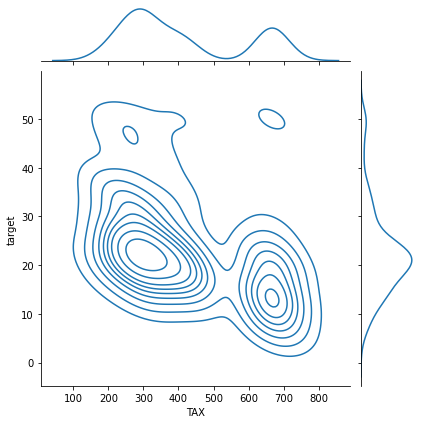

In [36]:
sns.jointplot(x='TAX',y='target',data=boston_df,kind='kde')

In [38]:
# Let's try Ridge Regression model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target",axis=1)
y = boston_df["target"]

In [40]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [41]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: target, Length: 506, dtype: float64

## Split into train and test set

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(f'X_train\n{X_train.shape}, \ny_train\n{y_train.shape}')

X_train
(404, 13), 
y_train
(404,)


In [48]:
# Create the Ridge model
from sklearn.linear_model import Ridge
regressor = Ridge()
regressor.fit(X_train,y_train)



Ridge()

In [49]:
# Check the score of the Ridge model
regressor.score(X_test,y_test)

0.775380673062985

### what if ridge is not working

got to - https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [53]:
# Let's try random forest Regressor
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

rf = RandomForestRegressor(n_estimators=180)
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=180)

In [54]:
rf.score(X_test,y_test)

0.9207334814652415

In [52]:
np.random.seed(42)
for i in range(10,200,10):
    print(f"Trying with {i} estimators...")
    rf = RandomForestRegressor(n_estimators=i).fit(X_train,y_train)
    print(f"Model accuracy on test set:{rf.score(X_test,y_test)}")
    print(" ")

Trying with 10 estimators...
Model accuracy on test set:0.9146007716949329
 
Trying with 20 estimators...
Model accuracy on test set:0.9222569713503597
 
Trying with 30 estimators...
Model accuracy on test set:0.9154488106365019
 
Trying with 40 estimators...
Model accuracy on test set:0.9127623501479215
 
Trying with 50 estimators...
Model accuracy on test set:0.9166463064891075
 
Trying with 60 estimators...
Model accuracy on test set:0.9193739435498736
 
Trying with 70 estimators...
Model accuracy on test set:0.9174039724773988
 
Trying with 80 estimators...
Model accuracy on test set:0.9205230522391934
 
Trying with 90 estimators...
Model accuracy on test set:0.9193160781415335
 
Trying with 100 estimators...
Model accuracy on test set:0.919214508823365
 
Trying with 110 estimators...
Model accuracy on test set:0.9191496719947724
 
Trying with 120 estimators...
Model accuracy on test set:0.9158604445101282
 
Trying with 130 estimators...
Model accuracy on test set:0.918688920385140

In [ ]:
! git add Choosing_model_regression.ipynb
! git commit -m "14:19/03-07-2021"
! git push origin main